In [1]:

import pandas as pd
import pyro
import torch
import pyro.distributions as dist
import numpy as np
import scipy.stats as stats
np.random.seed(42)
torch.manual_seed(42)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Describe a problem/dataset for which a probabilistic model can be used for analys.
For this course assignment, I will be using the "Dataset on Student Alcoholism and Academic Performance in High School" from [Kaggle] (https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance).
The dataset contains social and education features, which can be trained and evaluated on a machine-learning model. This includes features such as:
- school
- sex
- family size
- First semester grade
- Second semester grade

We will be leveraging this dataset to evaluate whether a probabilistic model is adequate for the prediction of Second-semester grade given provided features.



In [2]:
path_to_data_cls = "/all/dataset/EN_Dataset/en_lpor_classification.csv"
path_to_data_explorer= "/all/dataset/EN_Dataset/en_lpor_explorer.csv"
cls_df = pd.read_csv(path_to_data_cls)
exp_df = pd.read_csv(path_to_data_explorer)
cls_df

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,0,1,18,0,1,1,4,4,3,0,...,0,4,3,4,1,1,3,4,0,11
1,0,1,17,0,1,0,1,1,3,4,...,0,5,3,3,1,1,3,2,9,11
2,0,1,15,0,0,0,1,1,3,4,...,0,4,3,2,2,3,3,6,12,13
3,0,1,15,0,1,0,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,1,16,0,1,0,3,3,4,4,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,0,5,4,2,1,2,5,4,10,11
645,1,1,18,0,0,0,3,1,0,2,...,0,4,3,4,1,1,1,4,15,15
646,1,1,18,0,1,0,1,1,4,4,...,0,1,1,1,1,1,5,6,11,12
647,1,0,17,0,0,0,3,1,2,2,...,0,2,4,5,3,4,2,6,10,10


In [3]:
for c in exp_df.columns:
    print(exp_df[c])

0           Gabriel Pereira
1           Gabriel Pereira
2           Gabriel Pereira
3           Gabriel Pereira
4           Gabriel Pereira
               ...         
644    Mousinho da Silveira
645    Mousinho da Silveira
646    Mousinho da Silveira
647    Mousinho da Silveira
648    Mousinho da Silveira
Name: School, Length: 649, dtype: object
0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
644    Female
645    Female
646    Female
647      Male
648      Male
Name: Gender, Length: 649, dtype: object
0      18
1      17
2      15
3      15
4      16
       ..
644    19
645    18
646    18
647    17
648    18
Name: Age, Length: 649, dtype: int64
0      Urban
1      Urban
2      Urban
3      Urban
4      Urban
       ...  
644    Rural
645    Urban
646    Urban
647    Urban
648    Rural
Name: Housing_Type, Length: 649, dtype: object
0      Above 3
1      Above 3
2      Up to 3
3      Above 3
4      Above 3
        ...   
644    Above 3
645    Up to 3

In [4]:
unique_data = {}
for c in cls_df.columns:
    print(cls_df[c].describe())
    unique_data[c] = len(cls_df[c].unique())
unique_data

count    649.000000
mean       0.348228
std        0.476776
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: School, dtype: float64
count    649.000000
mean       0.590139
std        0.492187
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: Age, dtype: float64
count    649.000000
mean       0.303544
std        0.460143
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Housing_Type, dtype: float64
count    649.000000
mean       0.704160
std        0.456771
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Family_Size, dtype: float64
count    649.000000
mean       0.123267
std    

{'School': 2,
 'Gender': 2,
 'Age': 8,
 'Housing_Type': 2,
 'Family_Size': 2,
 'Parental_Status': 2,
 'Mother_Education': 5,
 'Father_Education': 5,
 'Mother_Work': 5,
 'Father_Work': 5,
 'Reason_School_Choice': 4,
 'Legal_Responsibility': 3,
 'Commute_Time': 4,
 'Weekly_Study_Time': 4,
 'Extra_Educational_Support': 2,
 'Parental_Educational_Support': 2,
 'Private_Tutoring': 2,
 'Extracurricular_Activities': 2,
 'Attended_Daycare': 2,
 'Desire_Graduate_Education': 2,
 'Has_Internet': 2,
 'Is_Dating': 2,
 'Good_Family_Relationship': 5,
 'Free_Time_After_School': 5,
 'Time_with_Friends': 5,
 'Alcohol_Weekdays': 5,
 'Alcohol_Weekends': 5,
 'Health_Status': 5,
 'School_Absence': 24,
 'Grade_1st_Semester': 17,
 'Grade_2nd_Semester': 16}

In [5]:
cls_df.columns

Index(['School', 'Gender', 'Age', 'Housing_Type', 'Family_Size',
       'Parental_Status', 'Mother_Education', 'Father_Education',
       'Mother_Work', 'Father_Work', 'Reason_School_Choice',
       'Legal_Responsibility', 'Commute_Time', 'Weekly_Study_Time',
       'Extra_Educational_Support', 'Parental_Educational_Support',
       'Private_Tutoring', 'Extracurricular_Activities', 'Attended_Daycare',
       'Desire_Graduate_Education', 'Has_Internet', 'Is_Dating',
       'Good_Family_Relationship', 'Free_Time_After_School',
       'Time_with_Friends', 'Alcohol_Weekdays', 'Alcohol_Weekends',
       'Health_Status', 'School_Absence', 'Grade_1st_Semester',
       'Grade_2nd_Semester'],
      dtype='object')

## Design a probabilistic model for solving the problem.

### Auxilary code from course

In [6]:
# @title
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoNormal


def svi(model, obs, guide=None, num_steps = 500, plot = False, verbose=False, lr=0.01):

    torch.manual_seed(999)

    pyro.clear_param_store()

    if guide is None:
        guide = AutoNormal(model)

    svi = pyro.infer.SVI(model=model,
                         guide=guide,
                         optim=SGD({"lr": lr, "momentum":0.1}),
                         loss=Trace_ELBO())

    elbo, a,b  = [], [], []

    for t in range(num_steps):
        elbo.append(-svi.step(obs))
        if t%100==0:
            print('Step: '+str(t)+'. ELBO: ' +str(elbo[-1]))


    if (plot):
        plt.plot(elbo[2:])
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("ELBO");
        plt.show()

    if verbose:
        print("Inference results:")
        for name, value in pyro.get_param_store().items():
            print(name, pyro.param(name).item())
            
def get_obs(i, obs):
    obs1 = {}
    for c in obs.keys():
        obs1[c]= obs[c][i]
    return obs1

### Simple Probabilistic model design

To design a probabilistic model of the features in this dataset, we will create a directed acycled graph representation of the random variables (i.e., features).
In this initial model, we will consider a quite simple model, where we consider personal and school-related observations.
Our initial model will be a naive bayes model, where the latent variable is the Grade in 2nd semester that we are interested in.
With this in mind, we create the following model:

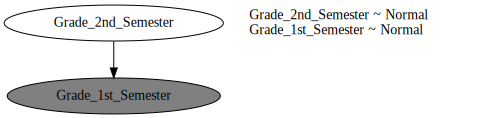

In [7]:
obs = {
        "School": torch.tensor(cls_df['School'], dtype=torch.float64),
        "Grade_2nd_Semester": torch.tensor(cls_df['Grade_2nd_Semester'], dtype=torch.float64),
        "Grade_1st_Semester": torch.tensor(cls_df['Grade_1st_Semester'], dtype=torch.float64),
        "Gender": torch.tensor(cls_df['Gender'], dtype=torch.float64),
        "Age": torch.tensor(cls_df['Age'], dtype=torch.float64),
        "Housing_Type": torch.tensor(cls_df['Housing_Type'], dtype=torch.float64),
        "Family_Size": torch.tensor(cls_df['Family_Size'], dtype=torch.float64),
        "Free_Time_After_School": torch.tensor(cls_df['Free_Time_After_School'], dtype=torch.float64),
        "Time_with_Friends": torch.tensor(cls_df['Time_with_Friends'], dtype=torch.float64),
      }

def model1_ultra_simple(obs):
    Grade_2nd_Semester = pyro.sample('Grade_2nd_Semester', dist.Normal(torch.mean(obs['Grade_2nd_Semester'], dtype=torch.float64), 1))
    Grade_1st_Semester = pyro.sample('Grade_1st_Semester', dist.Normal(Grade_2nd_Semester, 2), obs=obs['Grade_1st_Semester'])

def model1(obs):
    Grade_2nd_Semester = pyro.sample('Grade_2nd_Semester', dist.Normal(torch.mean(obs['Grade_2nd_Semester'], dtype=torch.float64), 1))
    Gender = pyro.sample('Gender', dist.Normal(Grade_2nd_Semester, 2), obs=obs['Gender'])
    Age = pyro.sample('Age', dist.Normal(Grade_2nd_Semester, 1), obs=obs['Age'])
    Housing_Type = pyro.sample('Housing_Type', dist.Normal(Grade_2nd_Semester, 1), obs=obs['Housing_Type'])
    Family_Size = pyro.sample('Family_Size', dist.Normal(Grade_2nd_Semester, 1), obs=obs['Family_Size'])
    Free_Time_After_School = pyro.sample('Free_Time_After_School', dist.Normal(Grade_2nd_Semester, 1), obs=obs['Free_Time_After_School'])
    Time_with_Friends = pyro.sample('Time_with_Friends', dist.Normal(Grade_2nd_Semester, 1), obs=obs['Time_with_Friends'])
    
    #Education/school
    School = pyro.sample('School', dist.Normal(Grade_2nd_Semester, 2), obs=obs['School'])
    Grade_1st_Semester = pyro.sample('Grade_1st_Semester', dist.Normal(Grade_2nd_Semester, 2), obs=obs['Grade_1st_Semester'])
    #Grade_2nd_Semester = pyro.sample('Grade_2nd_Semester', dist.Normal(student, 5))
    
pyro.render_model(model1_ultra_simple, model_args=(obs, ), render_distributions=True,filename='/all/notebooks/initial_model_ultra_simple.pdf')

Now we perform inference using the simple model and look at the posterior distribution from some of the samples in the input data to determine how fit a probabilitic model is on the 2nd semester grade.

In [8]:
for i in range(3):
    obs_1=get_obs(i,obs)
    print(obs_1)
    svi(model1_ultra_simple,obs_1, plot=False)
    print(dist.Normal(pyro.param("AutoNormal.locs.Grade_2nd_Semester").item(), pyro.param("AutoNormal.scales.Grade_2nd_Semester").item()))

{'School': tensor(0., dtype=torch.float64), 'Grade_2nd_Semester': tensor(11., dtype=torch.float64), 'Grade_1st_Semester': tensor(0., dtype=torch.float64), 'Gender': tensor(1., dtype=torch.float64), 'Age': tensor(18., dtype=torch.float64), 'Housing_Type': tensor(0., dtype=torch.float64), 'Family_Size': tensor(1., dtype=torch.float64), 'Free_Time_After_School': tensor(3., dtype=torch.float64), 'Time_with_Friends': tensor(4., dtype=torch.float64)}
Step: 0. ELBO: -63.809843779000346
Step: 100. ELBO: -18.26358605645546
Step: 200. ELBO: -14.684984026033687
Step: 300. ELBO: -14.117710385269348
Step: 400. ELBO: -13.901017418697718
Normal(loc: 8.719526290893555, scale: 0.8829014301300049)
{'School': tensor(0., dtype=torch.float64), 'Grade_2nd_Semester': tensor(11., dtype=torch.float64), 'Grade_1st_Semester': tensor(9., dtype=torch.float64), 'Gender': tensor(1., dtype=torch.float64), 'Age': tensor(17., dtype=torch.float64), 'Housing_Type': tensor(0., dtype=torch.float64), 'Family_Size': tensor(1

From this, we can see that a probabilistic model with the previous semester grade as the observed variable, we can get a reasonable distribution of the grade in the second semester.
Through, it could not handle the case in the first observation, where the grade substantially changes as there are no other random variables present that could explain the improvement in grade.
So now we look at the slightly more complex model that also considers additional observations about the student.

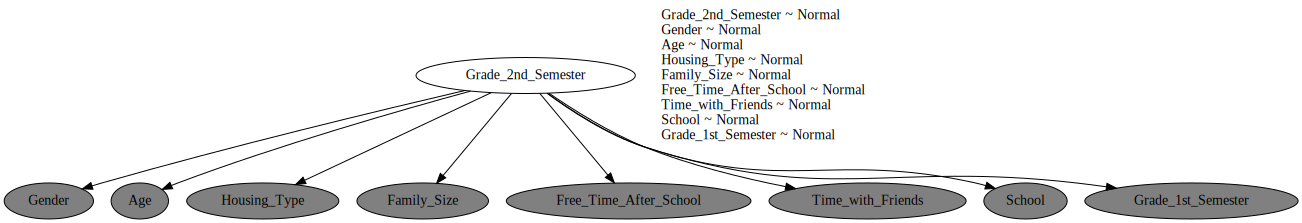

In [9]:
pyro.render_model(model1, model_args=(obs, ), render_distributions=True)
pyro.render_model(model1, model_args=(obs, ), render_distributions=True,filename='/all/notebooks/initial_model.pdf')

In [10]:
for i in range(3):
    obs_1=get_obs(i,obs)
    print(obs_1)
    svi(model1,obs_1, plot=False)
    print(dist.Normal(pyro.param("AutoNormal.locs.Grade_2nd_Semester").item(), pyro.param("AutoNormal.scales.Grade_2nd_Semester").item()))

{'School': tensor(0., dtype=torch.float64), 'Grade_2nd_Semester': tensor(11., dtype=torch.float64), 'Grade_1st_Semester': tensor(0., dtype=torch.float64), 'Gender': tensor(1., dtype=torch.float64), 'Age': tensor(18., dtype=torch.float64), 'Housing_Type': tensor(0., dtype=torch.float64), 'Family_Size': tensor(1., dtype=torch.float64), 'Free_Time_After_School': tensor(3., dtype=torch.float64), 'Time_with_Friends': tensor(4., dtype=torch.float64)}
Step: 0. ELBO: -245.56148938075498
Step: 100. ELBO: -143.51632689398542
Step: 200. ELBO: -143.33719397815221
Step: 300. ELBO: -143.30267125311823
Step: 400. ELBO: -143.10229241420882
Normal(loc: 5.564002990722656, scale: 0.40598490834236145)
{'School': tensor(0., dtype=torch.float64), 'Grade_2nd_Semester': tensor(11., dtype=torch.float64), 'Grade_1st_Semester': tensor(9., dtype=torch.float64), 'Gender': tensor(1., dtype=torch.float64), 'Age': tensor(17., dtype=torch.float64), 'Housing_Type': tensor(0., dtype=torch.float64), 'Family_Size': tensor

Including the additional Features did improve the posterior distribution for grade in second semester for the first sample. Nevertheless, it worsens the the posterior distribution for the remaining samples. This could likely be explained by the ordinal features that have been included now, which a normal distribution is likely not to be the best decisision for, e.g., gender is binary (0 or 1).


#### Bayesian Linear Regression
We have so far looked at a probabilistic model that utilized distributions and domain knowledge to model the dataset. We now look into a probabilitic model that is learned from the input samples instead. Now we train a probabilistic model for predicting the grade in second semester directly.

#### imports

In [11]:
!pip install -q pyro-ppl torch

import numpy as np
import pandas as pd
import seaborn as sns
import torch
import types
import matplotlib.pyplot as plt
from pyro.infer import Predictive
import pyro
from pyro.distributions import Normal, Uniform, Delta, Gamma, Binomial
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
import torch.distributions.constraints as constraints
import pyro.optim as optim
from pyro.contrib.autoguide import AutoNormal

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# for CI testing
pyro.set_rng_seed(1)
pyro.enable_validation(True)

#### Linear Regression Model

In [12]:
df = cls_df.sample(frac=1)
x_df = df.loc[:, df.columns != 'Grade_2nd_Semester']
x_data = torch.tensor(x_df.values, dtype=torch.float32)
target = torch.tensor( df['Grade_2nd_Semester'], dtype= torch.float32)

First we try regular regression

In [13]:
class RegressionModel():
    def __init__(self):
        self.w = torch.nn.Parameter(torch.zeros(1, 30))
        self.b = torch.nn.Parameter(torch.zeros(1, 1))

    def params(self):
        return {"b":self.b, "w": self.w}

    def predict(self, x_data):
        return (self.b + torch.mm(self.w, torch.t(x_data))).squeeze(0)
regression_model = RegressionModel()

In [14]:
def least_squares_solution(x_data, y_data, regression_model, verbose=True):
    loss_fn = torch.nn.MSELoss(reduction='sum')
    optim = torch.optim.Adam(regression_model.params().values(), lr=0.05)
    num_iterations = 1000

    param = None
    for j in range(num_iterations):
        # run the model forward on the data
        y_pred = regression_model.predict(x_data)
        # calculate the mse loss
        loss = loss_fn(y_pred, y_data)
        # initialize gradients to zero
        optim.zero_grad()
        # backpropagate
        loss.backward()
        # take a gradient step
        optim.step()
        if (j + 1) % 500 == 0 and verbose:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss.item()))

        # Stored the learned parameters
        param = np.r_[regression_model.params()['b'].detach().numpy().copy().flatten(),
                      np.transpose(regression_model.params()['w'].detach().numpy()).copy().flatten()]
    # Inspect learned parameters
    if verbose:
        print("Learned parameters:")
        print(f"weights = {param}")

    return param

In [15]:
regression_model = RegressionModel()
model_lr = least_squares_solution(x_data, target, regression_model)

[iteration 0500] loss: 1316.0034
[iteration 1000] loss: 1314.9198
Learned parameters:
weights = [-1.19771652e-01 -4.41666469e-02  7.25471377e-02  9.39106718e-02
 -6.17222488e-02 -4.09602970e-02 -9.47946385e-02  3.79478596e-02
  6.87483624e-02 -3.81429167e-03  3.43898172e-03 -2.29201596e-02
 -1.07992105e-02 -4.05328870e-02  6.78816019e-03 -1.74021143e-02
 -3.55668701e-02  1.75208285e-01 -4.92620142e-03  9.95961949e-03
  2.53744453e-01  8.81343037e-02 -2.27001280e-01  1.41786680e-01
 -5.80995567e-02 -3.61363515e-02 -5.39454957e-03 -4.76297177e-02
 -9.15667042e-02  8.67469294e-04  8.74014258e-01]


#### Bayesian Linear Regression

Now we implement a Bayesian Linear regression model that considers the uncertainty in predictions as well.

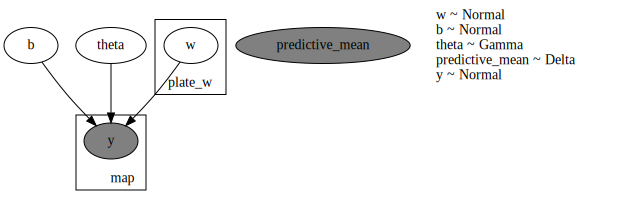

In [16]:
def bay_lin_model(x_data, y_data):
    # weight and bias priors
    with pyro.plate("plate_w", 30):
        w = pyro.sample("w", dist.Normal(torch.zeros(1,30), torch.ones(1,1)))

    # Define a random variable "b" to model the intercept.
    b = pyro.sample("b", dist.Normal(0., 1000.))
    theta = pyro.sample("theta", dist.Gamma(1., 1.))
    mean = (b + torch.mm(x_data,torch.t(w))).squeeze(-1)
    pyro.deterministic("predictive_mean", mean)
    
    with pyro.plate("map", len(x_data)):
        pyro.sample("y", Normal(loc=mean, scale=torch.sqrt(1. / theta)), obs=y_data)
        
pyro.render_model(bay_lin_model, model_args=(x_data, target), render_distributions=True, filename="/all/notebooks/bayesian_lin_regression.pdf")

In [17]:
guide = AutoNormal(bay_lin_model)

In [18]:
def train(x_data, y_data, model, guide_=None, num_iterations=1500, verbose=True):
    optim = Adam({"lr": 0.1})
    param = None
    if guide_ is None:
        guide = AutoNormal(model)
    else:
        guide=guide_
    svi = SVI(model, guide, optim, loss=Trace_ELBO(), num_samples=10)
    pyro.clear_param_store()

    for j in range(num_iterations):
        # calculate the loss and take a gradient step
        loss = svi.step(x_data, y_data)
        if j % 500 == 0:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss / len(x_data)))
    param = {'vi_parameters': pyro.get_param_store().get_state(),
                   'guide': guide}
    return param

In [19]:
guide = AutoNormal(bay_lin_model)
param = train(x_data, target, bay_lin_model, guide_=guide)

[iteration 0001] loss: 86.1809
[iteration 0501] loss: 2.1522
[iteration 1001] loss: 1.9421


In [20]:
svi_samples = {}
pyro.get_param_store().set_state(param['vi_parameters'])
predictive = pyro.infer.Predictive(bay_lin_model, guide=param['guide'], num_samples=1)
svi_samples = predictive(x_data, None)

svi_samples

{'w': tensor([[[-9.4578e-02,  2.7711e-04,  1.0419e-01, -1.2145e-01, -1.2273e-01,
           -7.2761e-02,  5.0629e-02,  6.9351e-02,  1.1379e-02,  3.0281e-03,
            1.1281e-02,  7.3054e-02, -4.5220e-02,  2.0006e-02,  5.1281e-01,
           -1.4728e-02, -4.2946e-01, -1.0049e-01,  1.1980e-01,  2.3944e-01,
           -1.9091e-02, -2.4484e-01,  1.6481e-01, -2.7300e-02, -6.9451e-03,
           -2.8789e-02, -3.0573e-02, -8.5326e-02,  1.1151e-02,  8.8852e-01]]]),
 'b': tensor([[-0.1264]]),
 'theta': tensor([[0.3729]]),
 'y': tensor([[ 9.0588, 13.3345, 11.4058,  7.9021, 13.1099, 10.8733, 13.2113, 15.8547,
          17.4586, 12.7621,  9.1146, 14.4075,  9.3216, 13.5580, 13.9067, 12.1706,
          10.8657,  9.9054, 11.5744, 14.1208, 14.0538,  8.5775,  5.7076,  9.8686,
           8.1386,  8.0085, 10.4025, 13.8142, 13.2485, 12.0996,  8.9272, 11.3705,
          12.6708, 12.3130, 10.0237, 12.2538, 11.3009, 17.0135, 18.7477, 11.5693,
          16.2716, 10.3301, 11.5248, 13.0325, 11.6706, 15.4927,

In [21]:
svi_samples['y'].shape,svi_samples['predictive_mean'].shape

(torch.Size([1, 649]), torch.Size([1, 1, 649]))

In [22]:
mse = torch.nn.MSELoss(reduction='sum')
mse(svi_samples['y'],svi_samples['predictive_mean'].reshape([-1,649]))

tensor(1755.3507)

In [23]:
for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name).data.numpy())

AutoNormal.locs.w [[-0.0372846   0.09688044  0.10472009 -0.05140055 -0.02094918 -0.07854569
   0.04351557  0.0813714   0.01015101  0.00976728 -0.01822499  0.02634195
  -0.02852789  0.01604445  0.04009835 -0.02506311  0.14793602  0.00497155
   0.03089924  0.24769253  0.09193851 -0.18990637  0.14900269 -0.05065377
  -0.03003312 -0.00164763 -0.04120974 -0.08678953  0.00617088  0.8827517 ]]
AutoNormal.scales.w [[0.07361729 0.08097765 0.00674213 0.06508545 0.04631461 0.15355343
  0.02360683 0.02876124 0.02246282 0.01557013 0.03239039 0.1053344
  0.02637458 0.03808348 0.19613232 0.04245005 0.3292237  0.05399856
  0.05708595 0.04322074 0.12196554 0.06013543 0.01113523 0.01964895
  0.01436012 0.04373692 0.02001604 0.0164749  0.01105459 0.00754676]]
AutoNormal.locs.b -0.17107768
AutoNormal.scales.b 0.052812543
AutoNormal.locs.theta -0.99671525
AutoNormal.scales.theta 0.052846897


Here, we observe a drop in performance in terms of the mean squared error when comparing the Bayesian linear regression against linear regression. This could be explained by that the considered probability distributions do not fit particularly well with this dataset, considering that the presence of ordinal features is big.